# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

### Import and explore the data. Clean the data for outliers and missing values. 

In [32]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [16]:
# Your code here
X = pd.DataFrame(data= boston.data,columns= boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [21]:
y = pd.DataFrame(data=boston.target,columns=["MEDV"])
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [26]:
df = X.join(y)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [30]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [27]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [29]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [45]:
# remove outliers based on z score for 95% if normal distribution
from scipy import stats
def outliers_z(df,threshold = 3):
    z_score = np.abs(stats.zscore(df))
    df_out  = df[(z_score < threshold).all(axis=1)]
    return df_out

df_clean = outliers_z(df)
df_clean.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

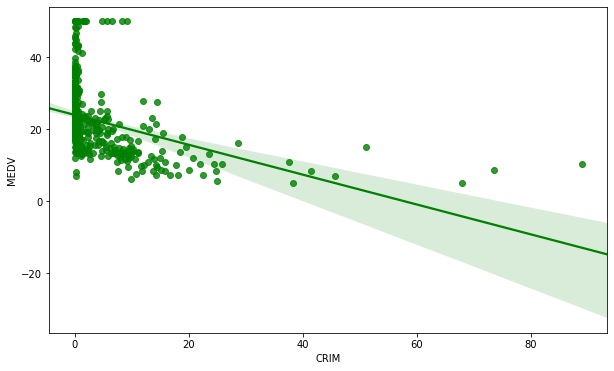

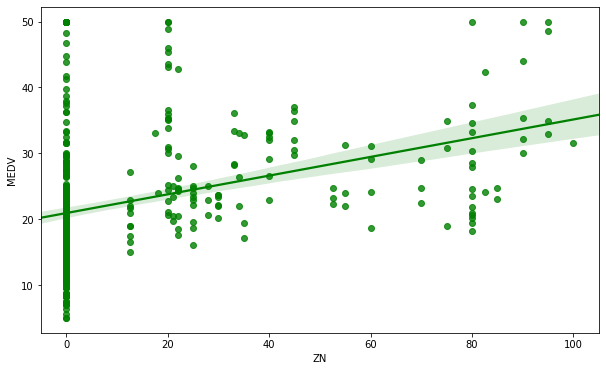

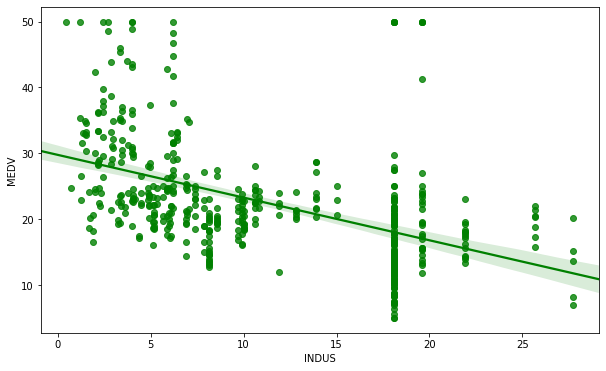

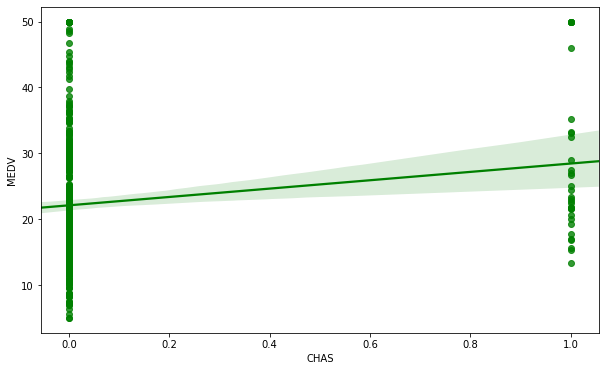

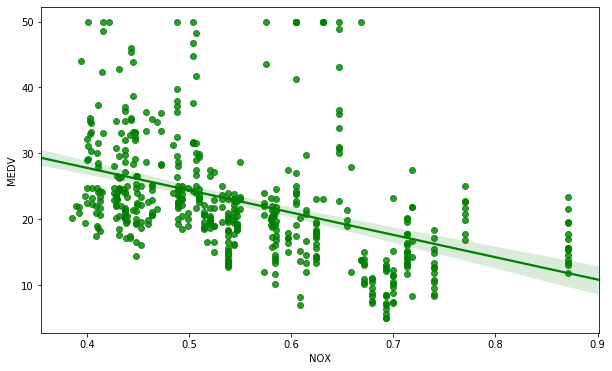

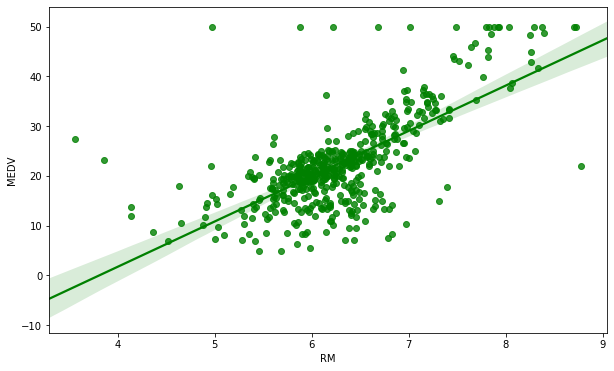

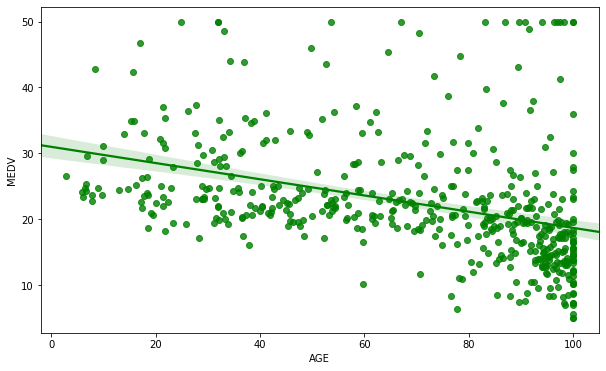

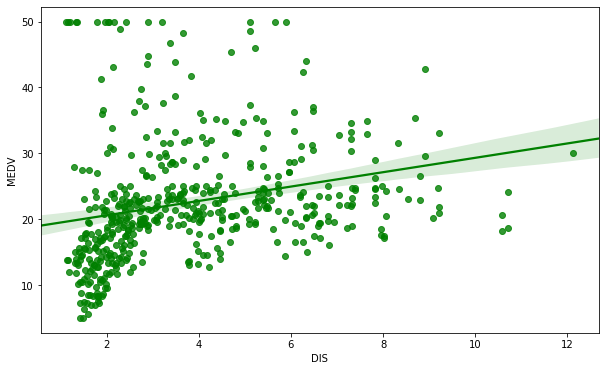

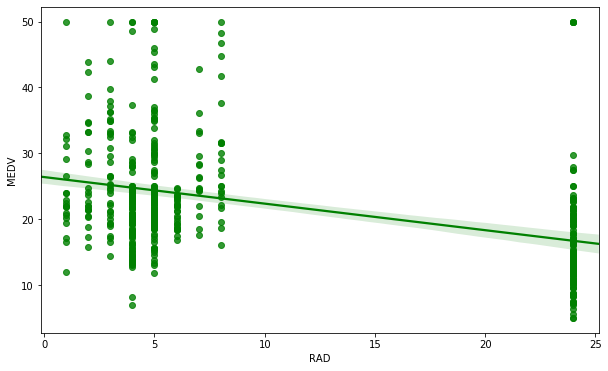

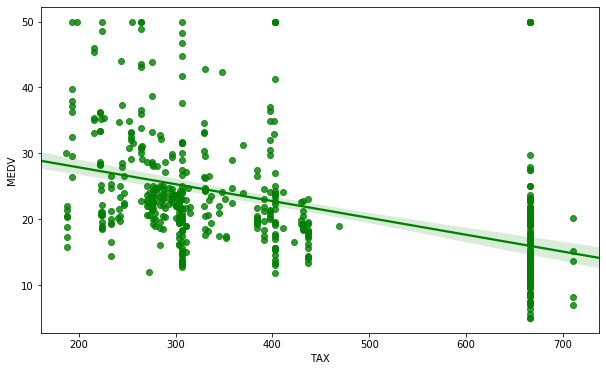

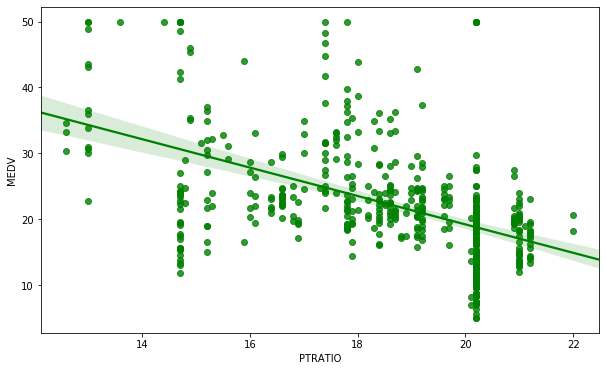

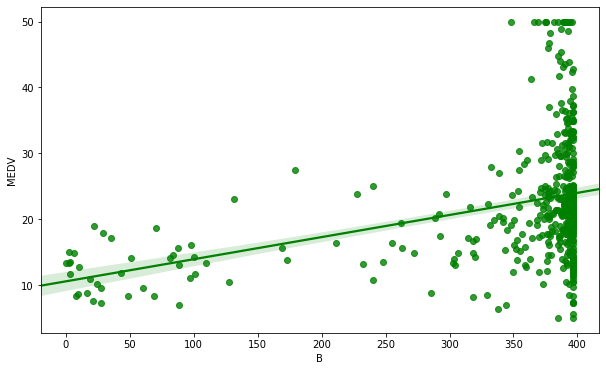

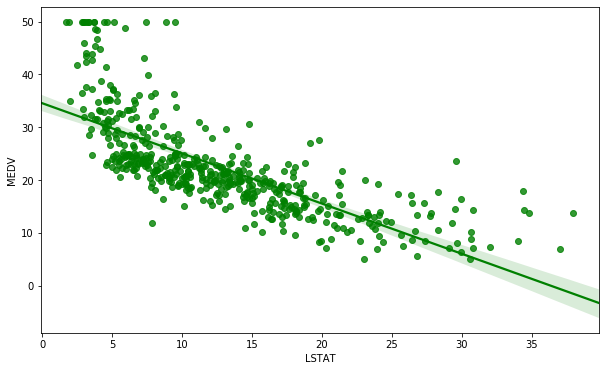

In [52]:
# Your plots here
for col in df_clean.columns[:-1]:
    corr = df[col].corr(df["MEDV"])
    plt.figure(figsize=(10,6))
    sns.regplot(x=df[col],y=df["MEDV"],color="green")
    

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here
"""
1) CRIM: expected: significant inverse dependency (neg slope), actual: inverse dep not significant,
with floor.
2) ZN: expected: normal postive dep (pos slope), actual:positive dep, but with
too high standard deviation to be significant.
3) INDUS: expected: normal negative dep, actual: significant negative dep, but significant std. dev
as well.
4) CHASE: expected: near river higher value, actual: confirmed, but very high std. dev
5) NOX: expected:low negative de, actual:low neg dep, with significant std dev
6) RM: expected: normal pos dep, actual: signiicant pos dep, pulled by outliers and centered around
6 rooms
7) AGE: expected: significant negative dep, actual: significant negative slope
8) DIS: expected: low negative dep, actual: low positive dep, but very high std dev
9) RAD:
"""

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [53]:
# Your response here
corr = df_clean.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.235368,0.496014,NaN,0.543941,-0.256220,0.419317,-0.458391,0.797353,0.731316,0.322394,-0.306526,0.543535,-0.418531
ZN,-0.235368,1.000000,-0.482283,NaN,-0.484217,0.285338,-0.507627,0.601974,-0.265506,-0.277640,-0.400607,0.141924,-0.377615,0.306172
INDUS,0.496014,-0.482283,1.000000,NaN,0.734989,-0.395686,0.599328,-0.675009,0.548687,0.699422,0.361641,-0.316034,0.601658,-0.486369
CHAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,0.543941,-0.484217,0.734989,NaN,1.000000,-0.311671,0.719230,-0.772557,0.579036,0.644144,0.160670,-0.356332,0.604435,-0.417222
RM,-0.256220,0.285338,-0.395686,NaN,-0.311671,1.000000,-0.219932,0.195682,-0.171454,-0.269194,-0.309908,0.146503,-0.630955,0.734041
AGE,0.419317,-0.507627,0.599328,NaN,0.719230,-0.219932,1.000000,-0.719924,0.403405,0.474359,0.242456,-0.242556,0.603143,-0.384446
DIS,-0.458391,0.601974,-0.675009,NaN,-0.772557,0.195682,-0.719924,1.000000,-0.450038,-0.514232,-0.227957,0.250530,-0.478924,0.234420
RAD,0.797353,-0.265506,0.548687,NaN,0.579036,-0.171454,0.403405,-0.450038,1.000000,0.892011,0.408510,-0.285008,0.448428,-0.347297
TAX,0.731316,-0.277640,0.699422,NaN,0.644144,-0.269194,0.474359,-0.514232,0.892011,1.000000,0.404856,-0.314385,0.526334,-0.453723


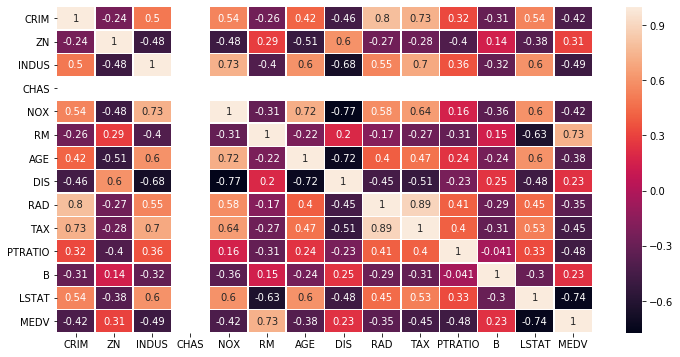

In [55]:
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True,linewidth=0.4)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [62]:
# Your code here
y_mean  = np.mean(df_clean["MEDV"])
print(y_mean)
y_median = np.median(df_clean["MEDV"])
print(y_median)
y_min = np.min(df_clean["MEDV"])
print(y_min)
y_max = np.max(df_clean["MEDV"])
print(y_max)
y_stdev = np.std(df_clean["MEDV"])
print(y_stdev)

22.35397590361446
21.2
5.6
50.0
8.067628447722646


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [63]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    mean_abs_err = mean_absolute_error(y_true, y_predict)
    mean_sqr_err = mean_squared_error(y_true, y_predict)
    r2_score = r2_score(y_true, y_predict)
    return mean_abs_err, mean_sqr_err, r2_score

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [69]:
# Your code here
from sklearn.model_selection import train_test_split
X = df_clean.drop("MEDV",axis=1)
y = df_clean["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 29)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [103]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

#Pipeline:
RFR1 = RandomForestRegressor(max_depth = 1, random_state=0)
RFR1_train = RFR1.fit(X_train,y_train)
RFR1_train_score = RFR1.score(X_train,y_train)
RFR1_test_score = RFR1.score(X_test,y_test)

RFR2 = RandomForestRegressor(max_depth = 2, random_state=0)
RFR2_train = RFR2.fit(X_train,y_train)
RFR2_train_score = RFR2.score(X_train,y_train)
RFR2_test_score = RFR2.score(X_test,y_test)

RFR4 = RandomForestRegressor(max_depth = 4, random_state=0)
RFR4_train = RFR4.fit(X_train,y_train)
RFR4_train_score = RFR4.score(X_train,y_train)
RFR4_test_score = RFR4.score(X_test,y_test)

RFR6 = RandomForestRegressor(max_depth = 6, random_state=0)
RFR6_train = RFR6.fit(X_train,y_train)
RFR6_train_score = RFR6.score(X_train,y_train)
RFR6_test_score = RFR6.score(X_test,y_test)

RFR8 = RandomForestRegressor(max_depth = 8, random_state=0)
RFR8_train = RFR8.fit(X_train,y_train)
RFR8_train_score = RFR8.score(X_train,y_train)
RFR8_test_score = RFR8.score(X_test,y_test)

RFR10 = RandomForestRegressor(max_depth = 10, random_state=0)
RFR10_train = RFR10.fit(X_train,y_train)
RFR10_train_score = RFR10.score(X_train,y_train)
RFR10_test_score = RFR10.score(X_test,y_test)

Now, plot the score for each tree on the training set and on the testing set.

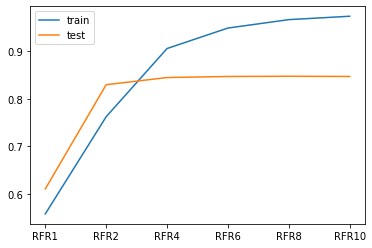

In [108]:
plt.plot(["RFR1","RFR2","RFR4","RFR6","RFR8","RFR10"],[RFR1_train_score,RFR2_train_score,RFR4_train_score,\
                                     RFR6_train_score,RFR8_train_score,RFR10_train_score],label="train")

plt.plot(["RFR1","RFR2","RFR4","RFR6","RFR8","RFR10"],[RFR1_test_score,RFR2_test_score,RFR4_test_score,\
                                     RFR6_test_score,RFR8_test_score,RFR10_test_score],label="test")
plt.legend()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
"""
After depth = 4, the deeper the more the model is prone to overfitting...
reducing the performance as represented by the learning curve
"""

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [87]:
# Your response here
"""
When the model is trained with depth of 1 it suffers from high bias, while with depth of 10
it suffers from high variance. This is because the depth represents the complexity of the model.
"""


'\nWhen the model is trained with depth of 1 it suffers from high bias, while with depth of 10\nit suffers from high variance. This is because the depth represents the complexity of the model.\n'

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [92]:
# Your response here
"""
I think, looking at the plots of learning curve above, that the best model is probably
RFR with max depth 4
"""

'\nI think, looking at the plots with score above, that the best model is probably RFR with max \ndepth 2\n'

In [93]:
y_pred = RFR1.predict(X_test)
print(r2_score(y_test, y_pred))

y_pred = RFR2.predict(X_test)
print(r2_score(y_test, y_pred))

y_pred = RFR4.predict(X_test)
print(r2_score(y_test, y_pred))

y_pred = RFR6.predict(X_test)
print(r2_score(y_test, y_pred))

y_pred = RFR8.predict(X_test)
print(r2_score(y_test, y_pred))

y_pred = RFR10.predict(X_test)
print(r2_score(y_test, y_pred))

0.6030833102192944
0.8254083637468235
0.8505434145629852
0.8465333524813263
0.8518386237666744
0.8444381712857252


In [105]:
"""
Looking at the scores over the predicted values it is in fact confirmed: RFR4 is surpassed only
by RFR8 in terms of performance, but by a very negligible amount, whcih does not compensate
the risk of overfitting when different test sets are used as shown by the learning curve.
"""

'\nLooking at the scores over the predicted values it is in fact confirmed: RFR4 is surpassed only\nby RFR8 in terms of performance, but by a very negligible amount, whcih does not compensate\nthe risk of overfitting when different test sets are used as shown by the learning curve.\n'

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [106]:
# Your response here
"""
1) Probably not much, only AGE feature is somehow valid for them.
2) Probably Floor and Single house VS Apartment would also play a role
3) Is should be tested on other test sets, but an average accuracy of 80% over the pipeline seems
a decent start
4) Probably with much poorer results, especially if the size of the population does not match
"""

'\n1) Probably not much, only AGE feature is somehow valid for them.\n2) Probably Floor and Single house VS Apartment would also play a role\n3) Is should be tested on other test sets, but an average accuracy of 80% over the pipeline seems\na decent start\n4) Probably with much poorer results, especially if the size of the population does not match\n'